In [ ]:
!pip install emoji
!pip install emojis
import re
import pandas as pd
import matplotlib.pyplot as plt
import emoji
import emojis
from collections import defaultdict
import datetime

In [ ]:

def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [ ]:
startsWithDateAndTime('7/26/18, 22:51 - Bobby: This message was deleted')


True

In [ ]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [ ]:

def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        name = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        name = None
    return date, time, name, message

In [ ]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversationPath = 'NotitiaChat.txt' 
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = [] 
    date, time, name = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, name, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, name, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

In [ ]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Name', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
null_authors_df = df[df['Name'].isnull()]
null_authors_df.head()

,Date,Time,Name,Message
0,2020-05-24,11:02,None,"AI Derek created group ""Notitia AI"""
1,2020-05-24,11:02,None,AI Derek added you
226,2020-05-27,19:04,None,Ḅj: https://drive.google.com/open?id=1GFmm6wWG...
245,2020-05-28,09:16,None,AI Derek: https://www.linkedin.com/posts/notit...
285,2020-05-31,18:35,None,Alex Notitia: We're having the meeting @ 7:00 ...


In [ ]:
df = df.drop(null_authors_df.index) # Drops all rows of the data frame containing messages from null authors


In [ ]:
senders = df.Name.unique()


In [ ]:
senders

array(['AI Derek', 'Norbert Notitia', 'Ḅj', 'Sadat Notitia',
       'Alex Notitia', 'Adwoa Notitia'], dtype=object)

In [ ]:
df.groupby(by="Name")["Name"].count()


Name
AI Derek           650
Adwoa Notitia      179
Alex Notitia       176
Norbert Notitia    227
Sadat Notitia       34
Ḅj                 381
Name: Name, dtype: int64

In [ ]:
df[df['Message'].str.contains("deleted")].groupby(by="Name")["Name"].count()


Name
AI Derek           3
Adwoa Notitia      2
Alex Notitia       1
Norbert Notitia    1
Ḅj                 1
Name: Name, dtype: int64

In [ ]:
df[df['Message'].str.contains("<Media omitted>")].groupby(by="Name")["Name"].count()


Name
AI Derek           44
Adwoa Notitia       3
Alex Notitia        5
Norbert Notitia    26
Sadat Notitia       2
Ḅj                 10
Name: Name, dtype: int64

In [ ]:
messages_count_over_time = df.groupby(by=["Date", "Name"]).Name.agg("count").to_frame("count_").reset_index().sort_values(by="Date")


In [ ]:
messages_count_over_time.head(60)


,Date,Name,count_
0,2020-05-24,AI Derek,44
1,2020-05-24,Alex Notitia,1
2,2020-05-24,Norbert Notitia,4
3,2020-05-24,Sadat Notitia,3
4,2020-05-24,Ḅj,5
5,2020-05-25,AI Derek,58
6,2020-05-25,Alex Notitia,7
7,2020-05-25,Norbert Notitia,34
8,2020-05-25,Sadat Notitia,6
9,2020-05-25,Ḅj,4


2020-05-25 00:00:00 58
2020-05-25 00:00:00 34
2020-07-12 00:00:00 39
2020-07-26 00:00:00 12
2020-07-12 00:00:00 26
2020-07-12 00:00:00 30


<Figure size 4320x720 with 0 Axes>

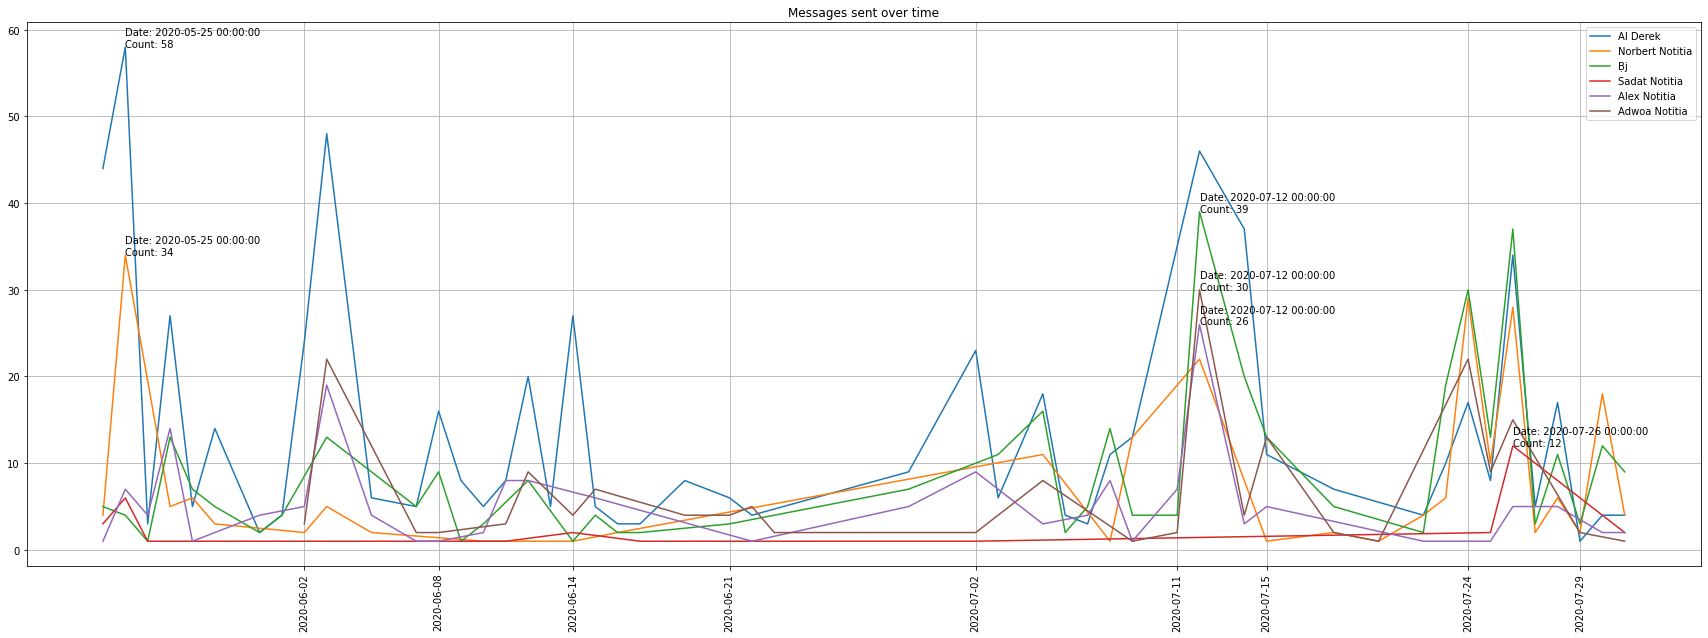

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(60,10))
freq = 3
fig, ax = plt.subplots(figsize=(30,10))
for sender in senders:
    tmp_df = messages_count_over_time[messages_count_over_time['Name'] == sender]
    
    # Spot max count_ date
    max_data = tmp_df.loc[tmp_df['count_'].idxmax()]
    print(max_data.Date, max_data.count_)
    ax.annotate('Date: {}\nCount: {}'.format(max_data.Date, max_data.count_), xy=(max_data.Date, max_data.count_))
    
    ax.plot(tmp_df.Date, tmp_df.count_, label = sender)
    plt.xticks(rotation=90)
    ax.legend()
    ax.grid(True)
    plt.title("Messages sent over time")
    plt.xticks(tmp_df.Date[::freq])

plt.savefig("over_time.png")

In [ ]:
def extract_emojis(columnname, my_df):
    # Credit 
    emojis=[]
    for string in my_df[columnname]:
        my_str = str(string)
        for each in my_str:
            if each in emoji.UNICODE_EMOJI:
                emojis.append(each)
    return emojis

In [ ]:
emojis_per_sender = {}
for sender in senders:
    emojis_count = defaultdict(int)
    messages = df[df['Name'] == sender][['Name','Message']]
    emojis = extract_emojis("Message", messages)
    
    for e in emojis:
        emojis_count[e] += 1    
    
    emojis_per_sender[sender] = emojis_count

In [ ]:
N = 10
def pretty_print(dict_, n):
    for key, value in dict_.items():
        if n>=0:
            print(key, "--->", value)
            n-=1

for sender, emojis in emojis_per_sender.items():
    print("Top {} emojis sent by {}".format(N, sender))
    sorted_dict = {k: v for k, v in sorted(emojis.items(), key=lambda item: item[1], reverse=True)}
    pretty_print(sorted_dict,N)

Top 10 emojis sent by AI Derek
😹 ---> 16
🔥 ---> 4
😀 ---> 4
🙌 ---> 3
🏿 ---> 3
😘 ---> 2
👋 ---> 1
🎉 ---> 1
🙆 ---> 1
🏾 ---> 1
♀ ---> 1
Top 10 emojis sent by Norbert Notitia
👌 ---> 5
🏽 ---> 5
🙆 ---> 2
🏾 ---> 2
♂ ---> 2
😅 ---> 1
👍 ---> 1
Top 10 emojis sent by Ḅj
😂 ---> 32
🙌 ---> 11
🔥 ---> 4
😁 ---> 4
😍 ---> 2
🤯 ---> 1
😊 ---> 1
✌ ---> 1
👍 ---> 1
🏾 ---> 1
Top 10 emojis sent by Sadat Notitia
🏼 ---> 4
🤣 ---> 4
👍 ---> 2
🤝 ---> 2
🙌 ---> 1
🏾 ---> 1
Top 10 emojis sent by Alex Notitia
😊 ---> 7
👍 ---> 5
🔥 ---> 3
😂 ---> 3
🏿 ---> 2
Top 10 emojis sent by Adwoa Notitia
🏾 ---> 80
🙌 ---> 34
😂 ---> 21
🙏 ---> 20
🔥 ---> 15
🤣 ---> 14
👍 ---> 12
👏 ---> 10
🚀 ---> 4
💌 ---> 4
🌈 ---> 4


In [ ]:
df.head

<bound method NDFrame.head of            Date  ...                                            Message
2    2020-05-24  ...   Good morning guys and I’m happy to have you here
3    2020-05-24  ...  So today we gonna have our webinar on data sci...
4    2020-05-24  ...  And so that means soon we should be launching ...
5    2020-05-24  ...  By way of roles and responsibilities  Myself, ...
6    2020-05-24  ...                        Gentlemen I welcome you all
...         ...  ...                                                ...
1675 2020-07-31  ...                                    <Media omitted>
1676 2020-07-31  ...                                                 🙌🏾
1677 2020-07-31  ...                                                  😍
1678 2020-07-31  ...                              Mehhhnnnnnnnnnn🔥🔥🔥🔥🔥🥰
1679 2020-07-31  ...                                                Lol

[1647 rows x 4 columns]>

In [ ]:
## From deleted messages section and media sent section, we notice that we need to remove those expressions before building a corpus
df = df[(df['Message'] != "<Media omitted>") & (~df['Message'].str.contains("deleted"))]

In [ ]:
df

,Date,Time,Name,Message
2,2020-05-24,11:02,AI Derek,Good morning guys and I’m happy to have you here
3,2020-05-24,11:03,AI Derek,So today we gonna have our webinar on data sci...
4,2020-05-24,11:03,AI Derek,And so that means soon we should be launching ...
5,2020-05-24,11:05,AI Derek,"By way of roles and responsibilities Myself, ..."
6,2020-05-24,11:05,AI Derek,Gentlemen I welcome you all
...,...,...,...,...
1673,2020-07-31,09:48,AI Derek,Checking
1676,2020-07-31,21:04,Sadat Notitia,🙌🏾
1677,2020-07-31,21:07,Ḅj,😍
1678,2020-07-31,21:15,Adwoa Notitia,Mehhhnnnnnnnnnn🔥🔥🔥🔥🔥🥰


In [ ]:
! pip install sklearn
! pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_string(string):
    pattern = re.compile(r'(\w+)')
    try:
        clean_string = pattern.search(string).group(1)
        a,b = 'áéíóúü','aeiouu'
        trans = str.maketrans(a,b)
        clean_string = clean_string.translate(trans)
    except AttributeError:
        clean_string = ""
    return clean_string    

### From some analysis, you can notice some expression that might be removed (e.g. laughter expressions). 
### In this step, I'm removing those expressions and also some meaningless word (lenght =< 2)
def build_vocab(corpus):
    ## Tokenize and merge
    vocab = list()
    tmp = list()
    for line in corpus:
        tmp.extend(line.split(" "))
    ## Normalize
        # To lowercase
    tmp = [word.lower() for word in tmp]
        # Remove punctuation and replace accented chars
    for w in tmp:
        cs = clean_string(w)
        if cs:
            vocab.append(cs)
    ## Remove stopwords
    stop_words = set(stopwords.words("spanish"))
    vocab = [w for w in vocab if w not in stop_words]
    vocab = [word for word in vocab if(len(word)>2)]
    return vocab

def prepare_text(text):
    ## Tokenize and merge
    vocab = list()
    tmp = list()
    
    tmp = text.split(" ")
    ## Normalize
        # To lowercase
    tmp = [word.lower() for word in tmp]
        # Remove punctuation and replace accented chars
    for w in tmp:
        cs = clean_string(w)
        if cs:
            vocab.append(cs)
    ## Remove stopwords
    stop_words = set(stopwords.words("spanish"))
    vocab = [w for w in vocab if w not in stop_words]
    ## Remove meaningless expressions
    vocab = [word for word in vocab if (len(word)>2)]
    
    return " ".join(vocab)

def generate_wordcloud(list_, sender, mask=False, mask_path=""):
    from wordcloud import WordCloud
    #convert list to string
    unique_string=(" ").join(list_)
    if mask:
        mask = np.array(Image.open(mask_path))
        wordcloud = WordCloud(width = 2000,mask=mask, height = 300, background_color="white").generate(unique_string)
    else:
        wordcloud = WordCloud(width = 2000, height = 500, background_color="white").generate(unique_string)
    
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("wordcloud_{}.png".format(sender))
    plt.show()    
    plt.close()    
    return

def word_freq(vocab):
    words = defaultdict(int)
    for word in vocab:
        words[word] += 1
    words = {k: v for k, v in sorted(words.items(), key=lambda item: item[1], reverse=True)}
    return words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
vocab

['thank',
 'you',
 'thank',
 'you',
 'boss',
 'thanks',
 'norbert',
 'hii',
 'please',
 'any',
 'links',
 'many',
 'thanks',
 'find',
 'the',
 'home',
 'page',
 'too',
 'long',
 'with',
 'too',
 'many',
 'information',
 'dispaly',
 'kept',
 'scrolling',
 'down',
 'its',
 'nothing',
 'though',
 'the',
 'courses',
 'were',
 'plenty',
 'well',
 'done',
 '233249435529',
 'chaiii',
 'should',
 'send',
 'mine',
 'too',
 '233243319300',
 'chaiii',
 'where',
 'eye',
 'mask',
 'the',
 'view',
 'that',
 'order',
 'for',
 'people',
 'succeed',
 'this',
 'challenging',
 'environment',
 'young',
 'people',
 'will',
 'have',
 'cultivate',
 'and',
 'imbibe',
 'the',
 'habit',
 'continuous',
 'learning',
 'addition',
 'identifying',
 'opportunities',
 'have',
 'the',
 'passion',
 'for',
 'learning',
 'different',
 'skills',
 'all',
 'the',
 'time',
 'and',
 'some',
 'how',
 'these',
 'skills',
 'always',
 'contribute',
 'career',
 'journey',
 'now',
 'can',
 'confidently',
 'say',
 'versatile',
 'and'

In [ ]:
#! pip install -U spacy-lookups-data
#! python -m spacy download es_core_news_sm


In [ ]:
! pip install wordcloud


In [ ]:
N = 20
for sender in senders:
    tmp_df = df[df['Name'] == sender][['Name','Message']]
    tmp_corpus = tmp_df.Message
    vocab = build_vocab(tmp_corpus)
    word_frequencies = word_freq(vocab)
    print("Top {} words written by {}".format(N, sender))
    pretty_print(word_frequencies,N)


Top 20 words written by AI Derek
the ---> 234
and ---> 164
you ---> 125
for ---> 93
can ---> 72
this ---> 66
data ---> 62
will ---> 51
our ---> 50
with ---> 47
science ---> 44
that ---> 41
sure ---> 40
are ---> 37
too ---> 36
all ---> 35
your ---> 34
good ---> 32
have ---> 31
233504782862 ---> 30
send ---> 29
Top 20 words written by Norbert Notitia
the ---> 61
can ---> 46
and ---> 29
you ---> 16
them ---> 16
are ---> 14
with ---> 14
for ---> 13
what ---> 13
work ---> 13
get ---> 11
will ---> 11
great ---> 10
this ---> 10
233243319300 ---> 10
call ---> 10
some ---> 10
need ---> 10
their ---> 10
how ---> 9
sure ---> 9
Top 20 words written by Ḅj
the ---> 83
sure ---> 42
and ---> 36
you ---> 36
okay ---> 35
great ---> 23
for ---> 21
good ---> 19
yeah ---> 18
can ---> 18
this ---> 17
have ---> 15
with ---> 14
awesome ---> 12
please ---> 12
think ---> 10
people ---> 9
send ---> 8
hello ---> 8
233243319300 ---> 8
notitia ---> 8
Top 20 words written by Sadat Notitia
sure ---> 6
now ---> 2
shar

WordCloud for AI Derek


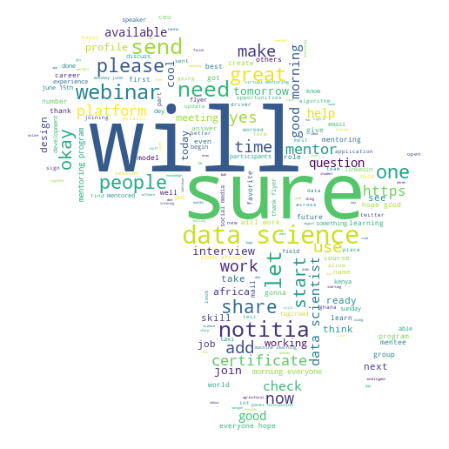

WordCloud for Norbert Notitia


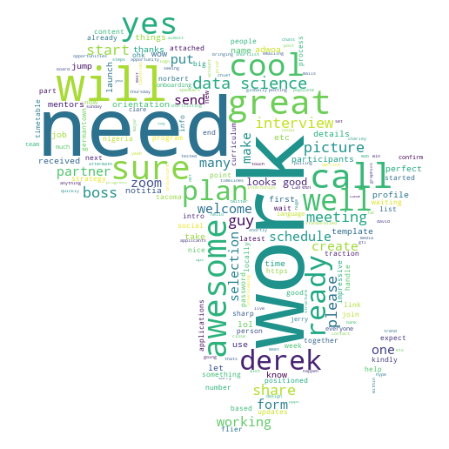

WordCloud for Ḅj


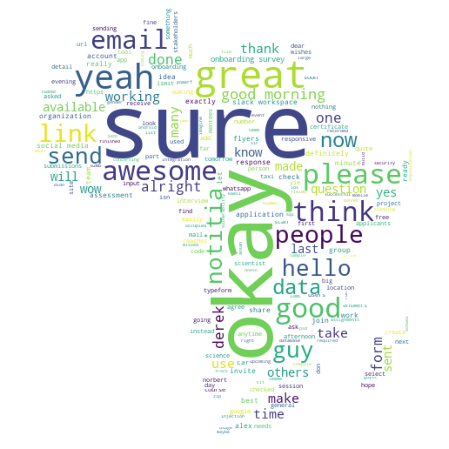

WordCloud for Sadat Notitia


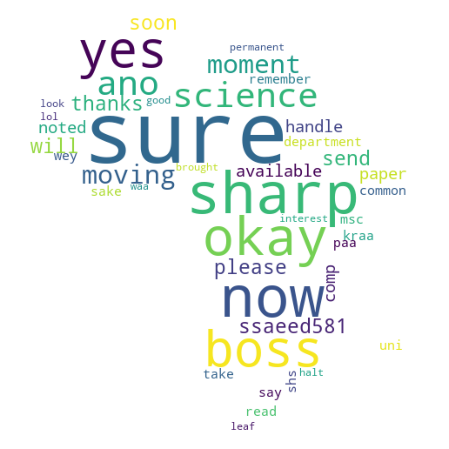

WordCloud for Alex Notitia


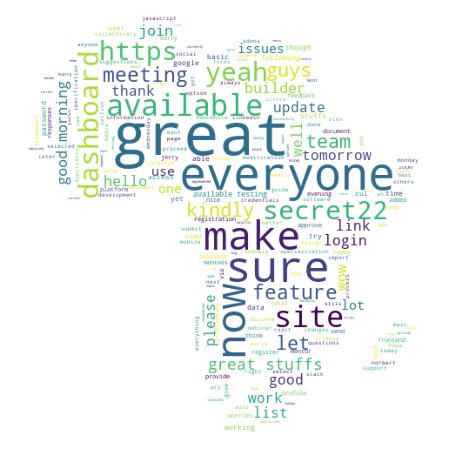

WordCloud for Adwoa Notitia


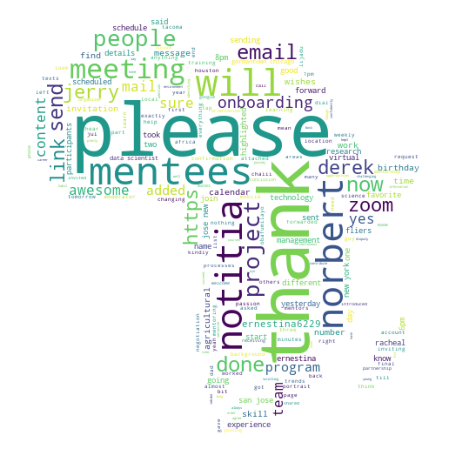

In [ ]:
### Wordcloud per sender
from PIL import Image
import numpy as np
for sender in senders:
    print("WordCloud for {}".format(sender))
    tmp_df = df[df['Name'] == sender][['Name','Message']]
    tmp_corpus = tmp_df.Message
    vocab = build_vocab(tmp_corpus)
    vocab = [word for word in vocab if "jaja" not in word]
    mask = 'mask.jpeg'
    generate_wordcloud(vocab, sender, True, mask)

In [ ]:
date = "2020-05-04"
date_df = df[df['Date'] == date][['Date', 'Name','Message']]

In [ ]:
print("Date: {}".format(date))


Date: 2020-05-04


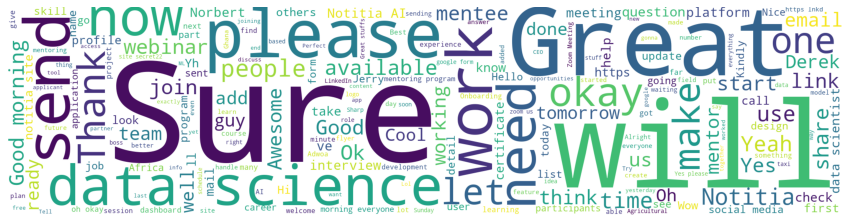

In [ ]:
from wordcloud import WordCloud
text = ' '.join(df.Message)
wordcloud = WordCloud(width = 2000, height = 500, background_color="white").generate(text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Messages Cloud")
plt.show()    
plt.close() 

In [ ]:
wordcloud

In [ ]:
df['Message'] = df['Message'].apply(lambda x: prepare_text(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#! pip install -U scikit-learn


In [ ]:
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        Message = "Topic #%d: " % topic_idx
        Message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(Message)
    print()

def topics(df):
    # Create Topics
    for user in df.Name.unique():
        print("#" * len(user) + "########")
        print("### " + user + " ###")
        print("#" * len(user) + "########\n")        
        
        data_samples = df[df.Name == user].Message
        data_samples = data_samples.tolist()
        # Extracting Features
        tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2)
        tf = tf_vectorizer.fit_transform(data_samples)

        # Fitting LDA
        topic_model = LatentDirichletAllocation(n_components=5, max_iter=15,
                                        learning_method='online',
                                        learning_offset=50.,
                                        random_state=0)
        topic_model.fit(tf)
        feature_names = tf_vectorizer.get_feature_names()
        
        
        print("\nTopics in LDA model:")
        print_top_words(topic_model, feature_names, 7)

In [ ]:
topics(df)
#the latent Dirichlet allocation (LDA) is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar

NameError: ignored